First of all, we set up the environment as follows.

In [11]:
# Core Requirement for Machine Learning
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, matthews_corrcoef, confusion_matrix
 
# Core Requirement for Data Processing
import numpy as np
import pandas as pd
 
# Core Requirement for Graphics Generation
import matplotlib.pyplot as plt
%matplotlib inline
 
# Others
import os


We define a function to create a mesh grid to use for plotting.

In [25]:
def make_meshgrid(x, y, h=1):
   x_min, x_max = int(x.min()) - 1, int(x.max()) + 1
   y_min, y_max = int(y.min()) - 1, int(y.max()) + 1
   xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
   return xx, yy


We also define a function to help with visualization of the data.

In [28]:
def plot_contours(ax, clf, xx, yy, **params):
   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)
   out = ax.contourf(xx, yy, Z, **params)
   return out


In this example, we will look at the data that has 2,500 samples and is spread over 2 classes. 

In [13]:
input_file = '/kaggle/input/svm-input/svm_input.csv'
ClusterDF=pd.read_csv(input_file, header=0, na_values='NaN')
print(ClusterDF.columns)
print(ClusterDF.describe())

Index(['F01', 'F02', 'T'], dtype='object')
               F01          F02            T
count  2500.000000  2500.000000  2500.000000
mean     -0.357842    48.737365     0.502000
std      62.145431    46.793813     0.500096
min    -138.533496  -122.941273     0.000000
25%     -50.596680    17.424954     0.000000
50%     -14.791261    47.037317     1.000000
75%      48.308780    81.998086     1.000000
max     209.938456   194.045940     1.000000


In [14]:
X=np.array(ClusterDF[['F01', 'F02']])
y=np.array(ClusterDF['T'])

We create the linear SVC (Support Vector Classifier) using four iterations. We will observe that this experiment fails, as the lack of enough iteration has an impact on the results of your machine learning.

In [15]:
clfbad = LinearSVC(random_state=123, max_iter=4, dual=False, verbose=True, class_weight='balanced', multi_class='ovr')

In [16]:
clfbad.fit(X, y)

[LibLinear]

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=4,
          multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
          verbose=True)

In [17]:
print('------------------------------------------------')
print('Coefficient:', clfbad.coef_)
print('------------------------------------------------')
print('Intercept', clfbad.intercept_)
print('------------------------------------------------')
print('Score', clfbad.score(X, y))
print('------------------------------------------------')

------------------------------------------------
Coefficient: [[-0.01936987  0.00474329]]
------------------------------------------------
Intercept [-0.01397294]
------------------------------------------------
Score 0.8948
------------------------------------------------


In [18]:
clf = LinearSVC(random_state=123, max_iter=10, dual=False, verbose=True, class_weight='balanced', multi_class='ovr')

In [19]:
clf.fit(X, y)

[LibLinear]

LinearSVC(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10,
          multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
          verbose=True)

In [21]:
binC=np.bincount(y)
for i in range(2):
    print('Class %3d: count: %5d weight: %7.4f' % (i, binC[i], (2500/(2*binC[i]))))

Class   0: count:  1245 weight:  1.0040
Class   1: count:  1255 weight:  0.9960


In [22]:
print('------------------------------------------------')
print('Coefficient:', clf.coef_)
print('------------------------------------------------')
print('Intercept', clf.intercept_)
print('------------------------------------------------')
print('Score', clf.score(X, y))
print('------------------------------------------------')

------------------------------------------------
Coefficient: [[-0.02296428  0.01051741]]
------------------------------------------------
Intercept [-0.37975513]
------------------------------------------------
Score 0.9132
------------------------------------------------


Finally, we show plots of the results machine learning showing predicted vs true

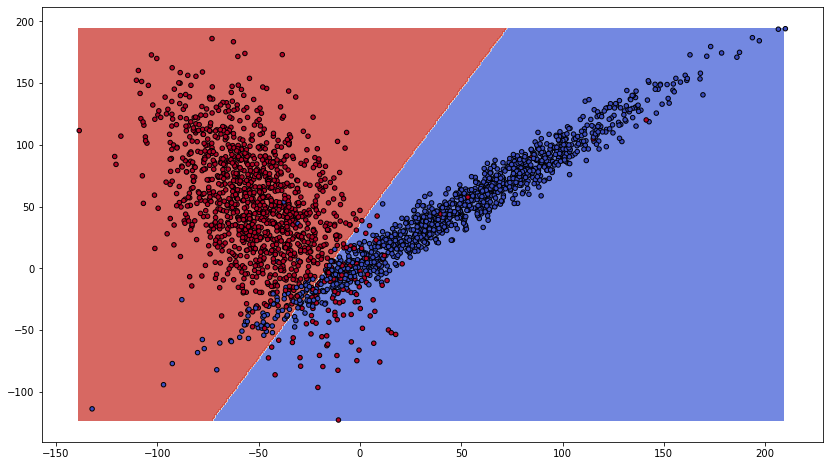

In [29]:
fig = plt.figure(figsize=(14, 8))
ax = fig.subplots(1, 1)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()